# Assignment : Bike Sharing Assignment

### Multiple Linear Regression

## Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

`cnt` variable indicates the total number of bike rentals, including both casual and registered and will be used as `Target variable`


### This Notebook is prepared and ran successfully in Jupytor lab 2.2.6/Jupytor notebook version 6.1.4

### Importing necessary libraries

In [178]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Reading and Understanding the Data



In [179]:
bike = pd.read_csv("day.csv", parse_dates=['dteday'])

In [180]:
# Checking first five rows of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
# Chceking the descriptive information

print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [182]:
#Checking the descriptive  statistics

print(bike.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [183]:
# Checking the shape of dataframe

print(bike.shape)

(730, 16)


`Insights from the Dataset` - Dataset has 730 rows and 16 columns. - Except one column, all other are either float or integer type. One column is date type. - Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. - We will have to analyse and decide whether to convert them to categorical or treat as integer.

### Data Quality Check

#### Checking for Null/Missing Values

In [184]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [185]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

`Inferences` - There are no missing/null values either in columns or rows.

#### Checking for Duplicates if present

In [186]:
# Creating a dummy dataframe (copy of original bike df) for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [187]:
bike_dup.shape

(730, 16)

`Inferences` - The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there is no duplicates in the dataset

#### Data Cleaning
- Checking value_counts() for entire dataframe. This will help to identify any Unknow/Junk values in the dataset.

In [188]:
#Creating a copy of dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]


for col in bike_dummy:
    print(bike_dummy[col].value_counts(), '\n')

2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2018-08-04    1
2018-10-05    1
2019-11-11    1
2019-02-12    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           .

`Inferences`- There seems to be no Junk/Unknown values in the dataset

#### Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:
- instant : Its only an index value 
- dteday : This has the date, Since we already have seperate columns for 'year' & 'month' we could live without this column.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two columns. 

In [189]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [190]:
#creating new dataframe without instant,dteday,casual and registered columns

bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


#### Creating Dummy Variables

##### We will create dummy variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. - Before creating dummy variables, we will have to convert them into 'category' data types

In [191]:
# Check the datatypes 
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [192]:
bike_new['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [193]:
bike_new['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light_rain_snow_Thunderstorm",4:'Heavy_Rain_Ice_Thunderstorm_Mist'},inplace=True)
bike_new.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [194]:
# Converting to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [195]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created as drop_first=True
### df = pd.get_dummies(df, columns=['type'])

bike_new = pd.get_dummies(bike_new,columns=['season','weathersit','mnth','weekday'] , drop_first=True)


# We will visualise the changes after the dummy creation.

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   yr                                       730 non-null    int64  
 1   holiday                                  730 non-null    int64  
 2   workingday                               730 non-null    int64  
 3   temp                                     730 non-null    float64
 4   atemp                                    730 non-null    float64
 5   hum                                      730 non-null    float64
 6   windspeed                                730 non-null    float64
 7   cnt                                      730 non-null    int64  
 8   season_spring                            730 non-null    uint8  
 9   season_summer                            730 non-null    uint8  
 10  season_winter                            730 non-n

In [196]:
bike_new.shape

(730, 30)

## Exploratory data analysis

### Visualising Numeric Variables
##### Let's make a pairplot of all the numeric variables.

In [197]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   yr                                       730 non-null    int64  
 1   holiday                                  730 non-null    int64  
 2   workingday                               730 non-null    int64  
 3   temp                                     730 non-null    float64
 4   atemp                                    730 non-null    float64
 5   hum                                      730 non-null    float64
 6   windspeed                                730 non-null    float64
 7   cnt                                      730 non-null    int64  
 8   season_spring                            730 non-null    uint8  
 9   season_summer                            730 non-null    uint8  
 10  season_winter                            730 non-n

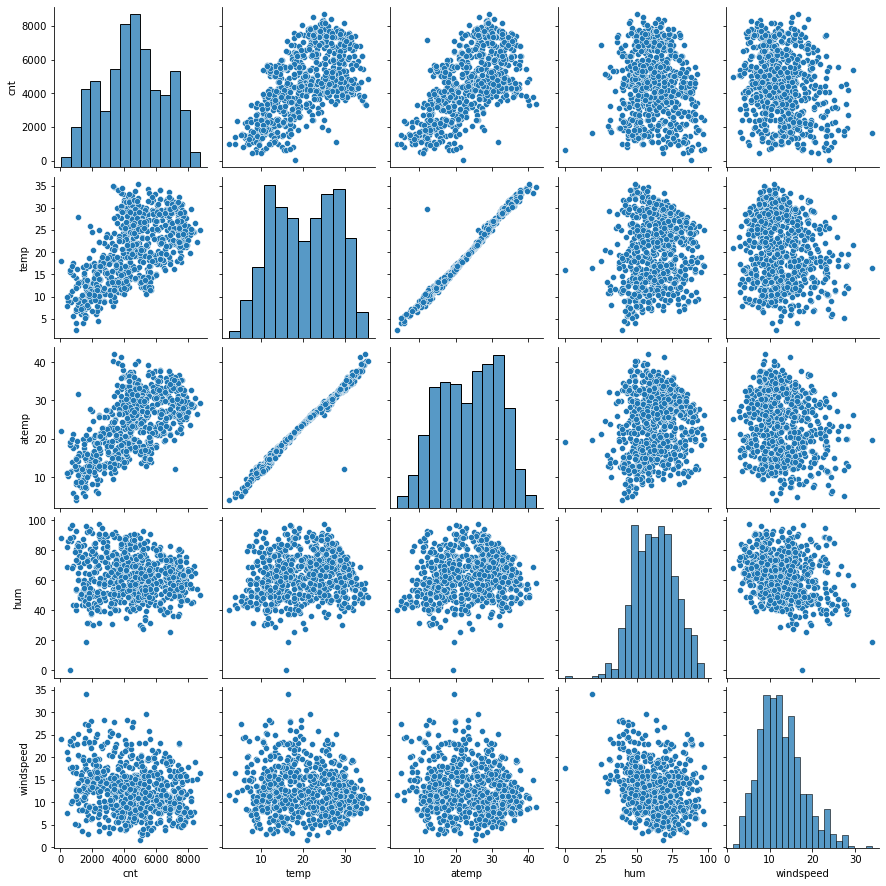

In [198]:
# Creating a new dataframe of only numeric variables and using for pairplot

vars_num=[ 'cnt','temp', 'atemp', 'hum', 'windspeed']

sns.pairplot(bike_new[vars_num])
plt.show()

### Visualising Catagorical Variables

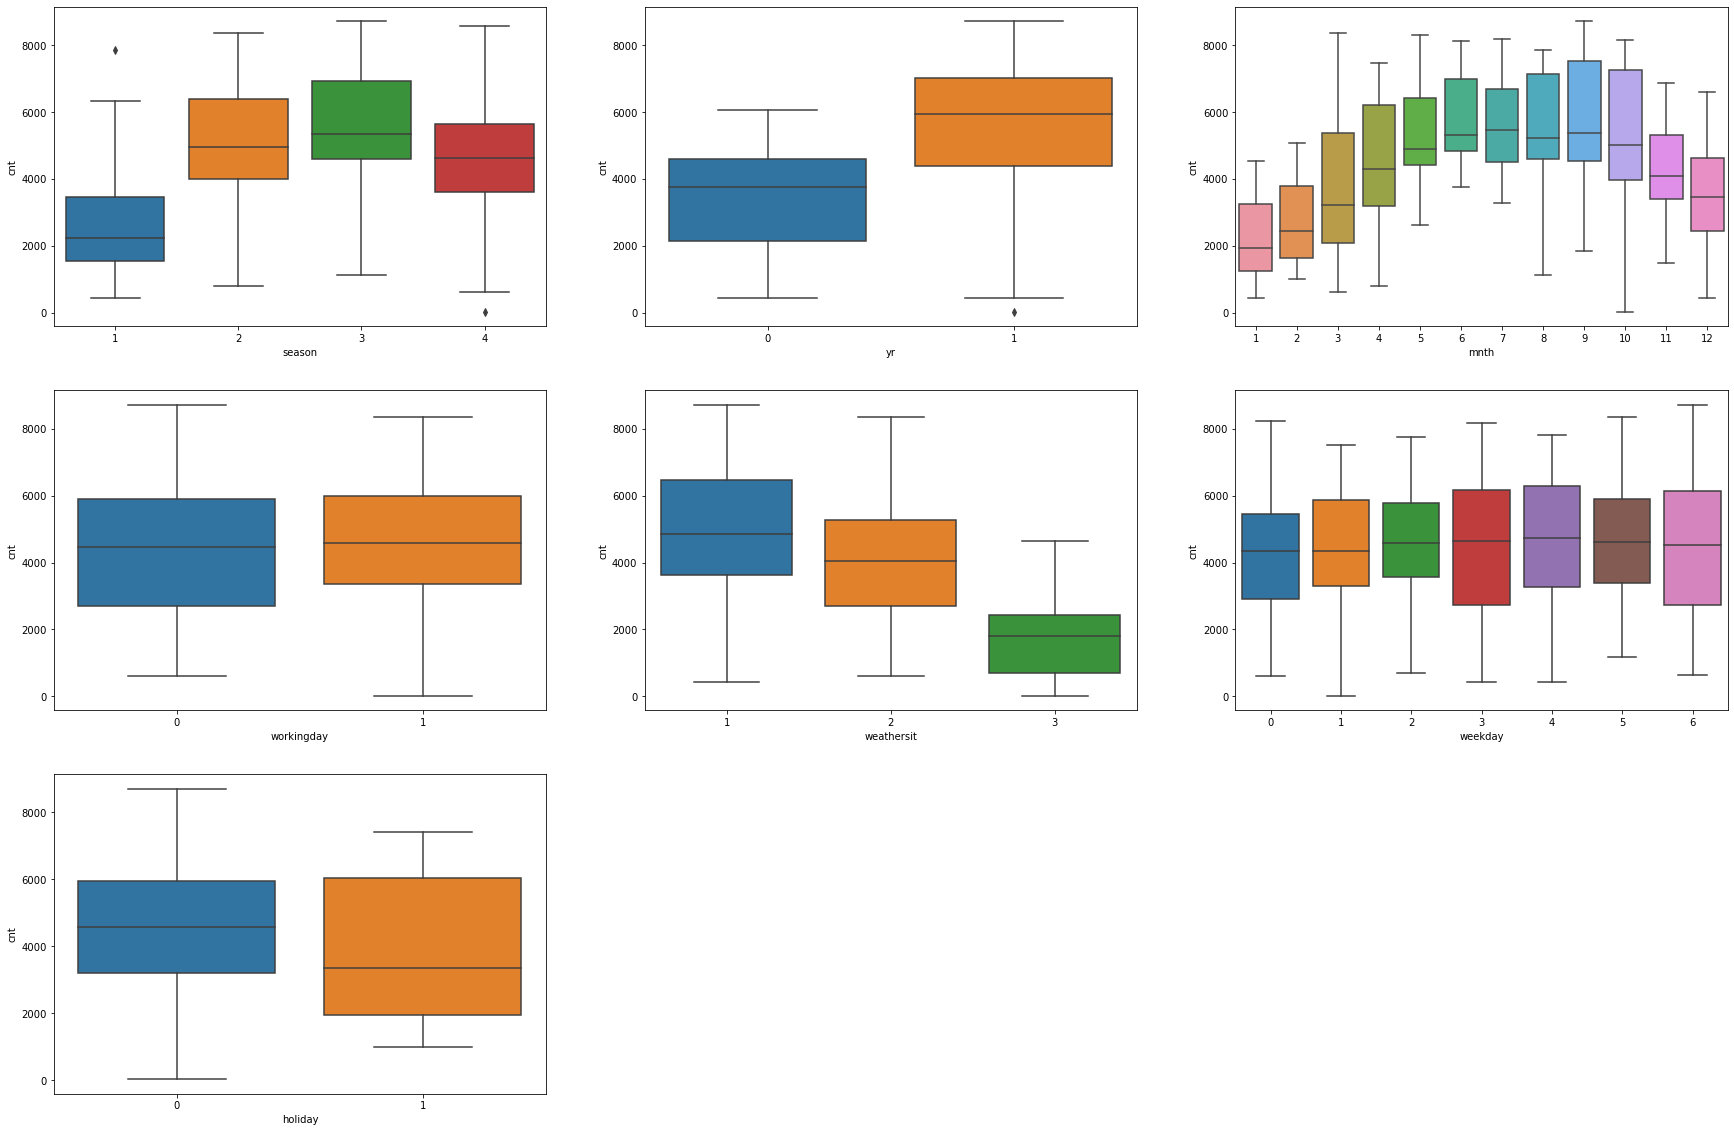

In [199]:
#Visualising categorical Variables to understand data better
#'season', yr','mnth','workingday','weathersit','weekday','holiday'
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)    
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

There were 7 categorical variables in the dataset.
Box plot is used to find relationship with dependent variable (‘cnt’) . 

`Inferences`: 
- season is a good predictor variable for the dependent variable 'cnt'
- mnth has some trends for bike booking and can be a good predictor variable
- weathersit also shows some trend towards bike booking
- holiday :Almost 97.6% of the bike booking were happening when it is not a holiday holiday CANNOT be a good predictor for the dependent variable
- weekday has some or no influence towards the predictor
- workingday Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking for 2 yrs so can be good predictor
- yr compare to 2018, 2019 has more bookings and can contribute to model


### Correlation Matrix

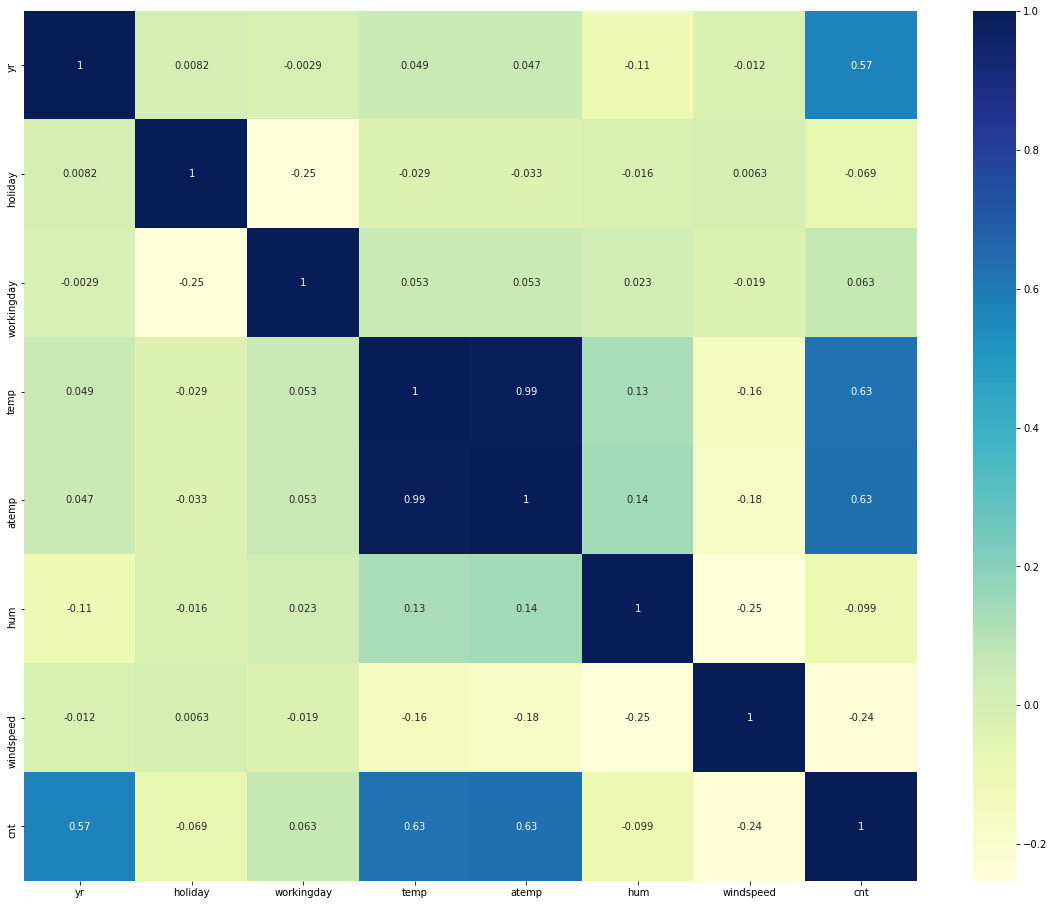

In [200]:
#for the variables originally the data set
plt.figure(figsize = (20, 16))
sns.heatmap(bike_new[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

`Inferences` - atemp and temp are highly correlated with each other and also with Target variable. We will check vif and p-value further to drop them

### Splitting the dataset

Splitting the data to Train and Test: - We will now split the data into Train and Test (70:30 ratio) 

In [201]:
# Check the shape before spliting

bike_new.shape

(730, 30)

In [202]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   yr                                       730 non-null    int64  
 1   holiday                                  730 non-null    int64  
 2   workingday                               730 non-null    int64  
 3   temp                                     730 non-null    float64
 4   atemp                                    730 non-null    float64
 5   hum                                      730 non-null    float64
 6   windspeed                                730 non-null    float64
 7   cnt                                      730 non-null    int64  
 8   season_spring                            730 non-null    uint8  
 9   season_summer                            730 non-null    uint8  
 10  season_winter                            730 non-n

In [203]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [204]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   yr                                       510 non-null    int64  
 1   holiday                                  510 non-null    int64  
 2   workingday                               510 non-null    int64  
 3   temp                                     510 non-null    float64
 4   atemp                                    510 non-null    float64
 5   hum                                      510 non-null    float64
 6   windspeed                                510 non-null    float64
 7   cnt                                      510 non-null    int64  
 8   season_spring                            510 non-null    uint8  
 9   season_summer                            510 non-null    uint8  
 10  season_winter                            510 non

In [205]:
df_test.shape

(219, 30)

### Correlation Matrix with all columns

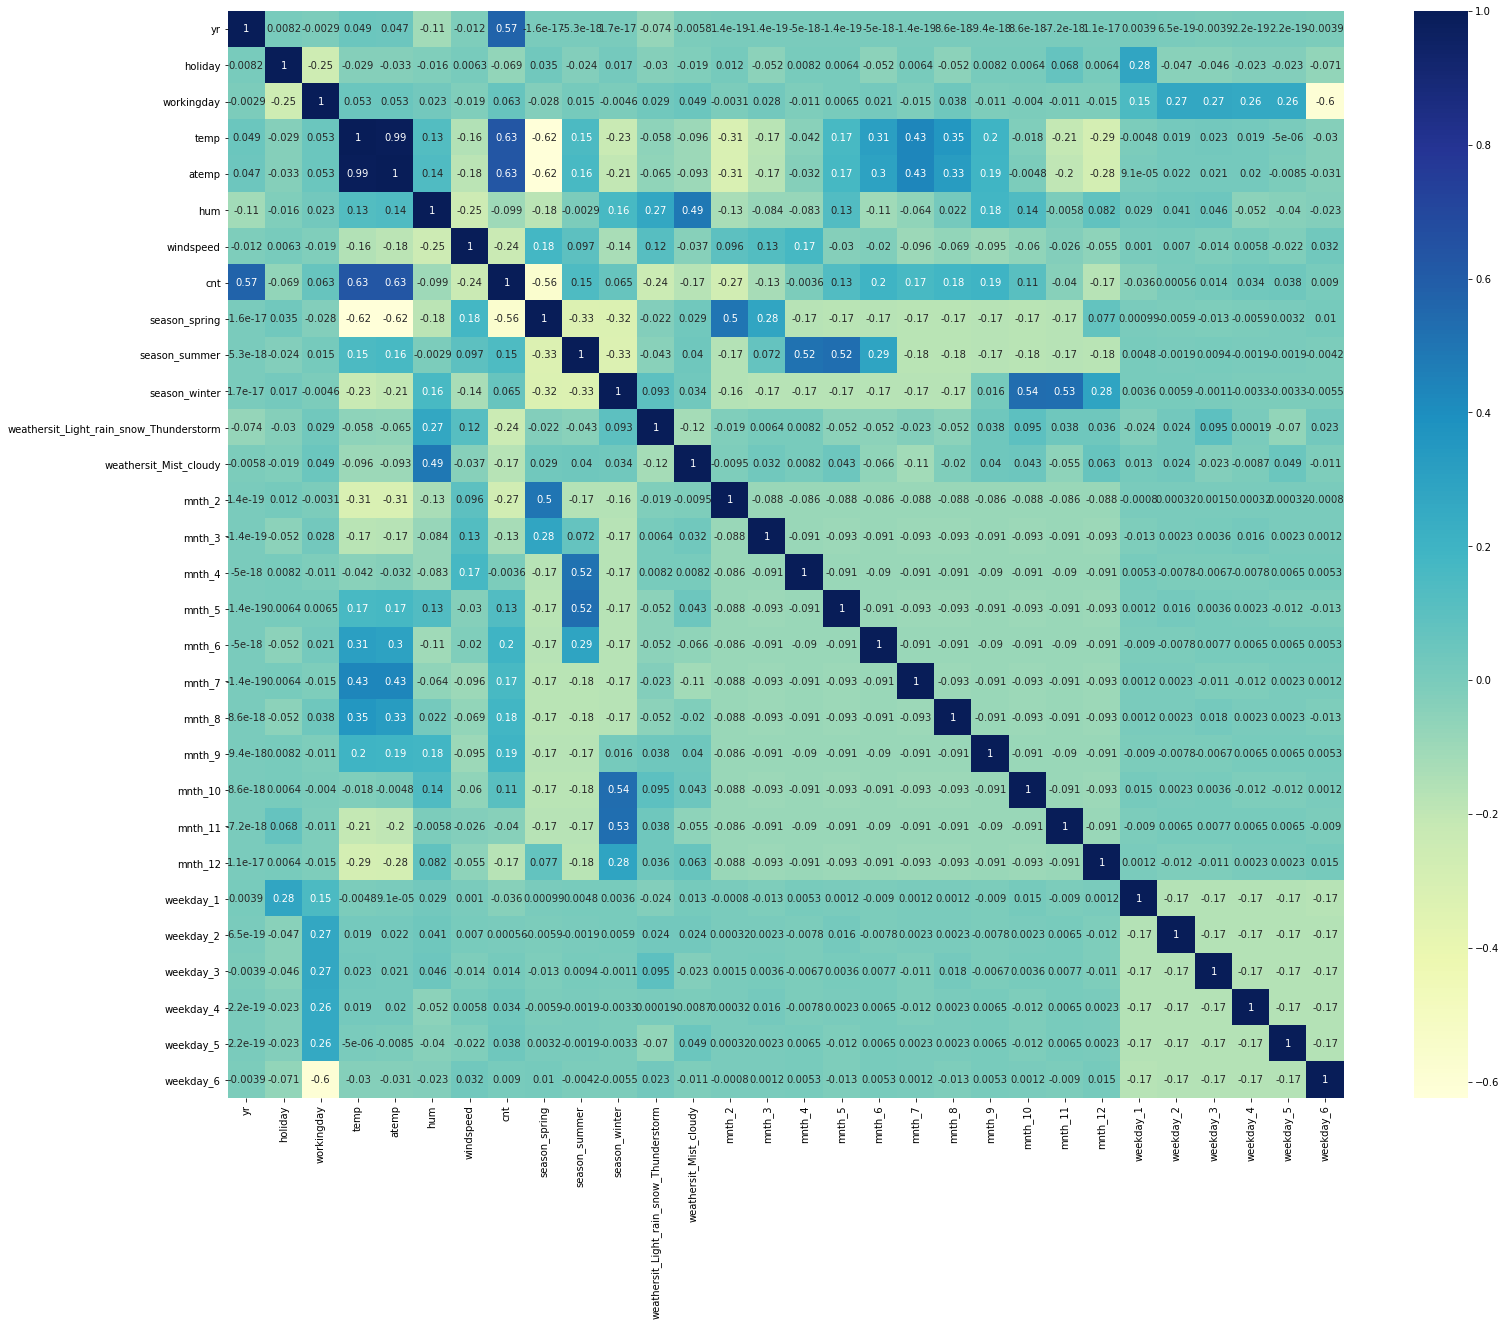

In [206]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
# considering dataframe: bike_new that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

`Inferences` - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model. 

### Rescaling the features

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.


In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
scaler = MinMaxScaler()   #instantiate

In [209]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,1,0,0,0,0,0,0,0,1
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light_rain_snow_Thunderstorm', 'weathersit_Mist_cloudy',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [211]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [212]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,1,0,0,0,0,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.082353,0.084314,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.275172,0.278131,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a Linear Model

#### Dividing into X and Y sets for the model building

In [214]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
- Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)
    Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset.

- Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

- RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

- This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [215]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [216]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [217]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('weathersit_Light_rain_snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 4),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1)]

In [218]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter',
       'weathersit_Light_rain_snow_Thunderstorm', 'weathersit_Mist_cloudy',
       'mnth_3', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6'],
      dtype='object')

In [219]:
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [220]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'stats model'

### Model 1

In [221]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,353.18
3,atemp,352.99
4,hum,23.69
5,windspeed,5.11
1,workingday,4.75
7,season_winter,2.92
6,season_spring,2.91
9,weathersit_Mist_cloudy,2.25
0,yr,2.05
14,weekday_6,1.82


In [222]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [223]:
# Check the parameters obtained

lr1.params

const                                      0.325036
yr                                         0.229064
workingday                                 0.041285
temp                                       0.325528
atemp                                      0.120080
hum                                       -0.184270
windspeed                                 -0.172259
season_spring                             -0.119929
season_winter                              0.043576
weathersit_Light_rain_snow_Thunderstorm   -0.269195
weathersit_Mist_cloudy                    -0.045603
mnth_3                                     0.057258
mnth_5                                     0.047588
mnth_9                                     0.092506
mnth_10                                    0.059264
weekday_6                                  0.054283
dtype: float64

In [224]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.90e-186
Time:                        09:53:18   Log-Likelihood:                 507.67
No. Observations:                 510   AIC:                            -983.3
Df Residuals:                     494   BIC:                            -915.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Model 2

#### Removing the variable 'atemp' based on its High p-value & High VIF

In [225]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

##### VIF Check

In [226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.37
2,temp,13.72
4,windspeed,4.99
1,workingday,4.74
5,season_spring,2.90
6,season_winter,2.89
8,weathersit_Mist_cloudy,2.25
0,yr,2.05
13,weekday_6,1.82
12,mnth_10,1.64


In [227]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [228]:
# Check the parameters obtained

lr2.params

const                                      0.327207
yr                                         0.229057
workingday                                 0.041261
temp                                       0.436551
hum                                       -0.182761
windspeed                                 -0.176481
season_spring                             -0.120035
season_winter                              0.044444
weathersit_Light_rain_snow_Thunderstorm   -0.270089
weathersit_Mist_cloudy                    -0.045883
mnth_3                                     0.057927
mnth_5                                     0.048396
mnth_9                                     0.091994
mnth_10                                    0.059598
weekday_6                                  0.054420
dtype: float64

In [229]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.26e-187
Time:                        09:53:18   Log-Likelihood:                 507.27
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     495   BIC:                            -921.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Model 3

##### Removing the variable 'hum' based on its Very High 'VIF' value. 

In [230]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [231]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.00
3,windspeed,4.97
1,workingday,4.56
5,season_winter,2.12
4,season_spring,2.09
0,yr,2.04
12,weekday_6,1.76
11,mnth_10,1.63
7,weathersit_Mist_cloudy,1.54
9,mnth_5,1.23


In [232]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [233]:
# Check the parameters obtained

lr3.params

const                                      0.223442
yr                                         0.233530
workingday                                 0.042806
temp                                       0.410550
windspeed                                 -0.139415
season_spring                             -0.124484
season_winter                              0.034843
weathersit_Light_rain_snow_Thunderstorm   -0.324503
weathersit_Mist_cloudy                    -0.076190
mnth_3                                     0.064059
mnth_5                                     0.035479
mnth_9                                     0.083540
mnth_10                                    0.057595
weekday_6                                  0.055082
dtype: float64

In [234]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.94e-183
Time:                        09:53:18   Log-Likelihood:                 495.48
No. Observations:                 510   AIC:                            -963.0
Df Residuals:                     496   BIC:                            -903.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Model 4

In [235]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [236]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.86
1,temp,4.41
0,yr,2.04
4,season_winter,2.00
3,season_spring,1.86
10,mnth_10,1.63
6,weathersit_Mist_cloudy,1.52
8,mnth_5,1.22
7,mnth_3,1.21
9,mnth_9,1.21


In [237]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [238]:
lr4.params

const                                      0.257657
yr                                         0.233666
temp                                       0.411490
windspeed                                 -0.142059
season_spring                             -0.124088
season_winter                              0.033259
weathersit_Light_rain_snow_Thunderstorm   -0.319645
weathersit_Mist_cloudy                    -0.074385
mnth_3                                     0.065614
mnth_5                                     0.034210
mnth_9                                     0.084146
mnth_10                                    0.057670
weekday_6                                  0.020744
dtype: float64

In [239]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.17e-181
Time:                        09:53:18   Log-Likelihood:                 488.19
No. Observations:                 510   AIC:                            -950.4
Df Residuals:                     497   BIC:                            -895.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Model 5

Removing the variable 'weekday_6'

In [240]:
X_train_new = X_train_new.drop(["weekday_6"], axis = 1)

In [241]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.81
1,temp,4.39
0,yr,2.04
4,season_winter,2.00
3,season_spring,1.85
10,mnth_10,1.63
6,weathersit_Mist_cloudy,1.52
8,mnth_5,1.22
9,mnth_9,1.21
7,mnth_3,1.20


In [242]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [243]:
lr5.params

const                                      0.262448
yr                                         0.233648
temp                                       0.408372
windspeed                                 -0.140327
season_spring                             -0.124707
season_winter                              0.032049
weathersit_Light_rain_snow_Thunderstorm   -0.319994
weathersit_Mist_cloudy                    -0.074668
mnth_3                                     0.064519
mnth_5                                     0.033729
mnth_9                                     0.084939
mnth_10                                    0.058287
dtype: float64

In [244]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.01e-181
Time:                        09:53:18   Log-Likelihood:                 486.58
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     498   BIC:                            -898.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### `Inferences`: - This model looks good, as there seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### Final Model Interpretation

Hypothesis Testing:
- Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0 
lr6 model coefficient values

- const 0.262448
- yr 0.233648
- temp 0.408372
- windspeed -0.140327
- season_spring -0.124707
- season_winter 0.032049
- weathersit_Light_rain_snow_Thunderstorm -0.319994
- weathersit_Mist_cloudy -0.074668
- mnth_3 0.064519
- mnth_5 0.064519
- mnth_9 0.084939
- mnth_10 0.058287

`Inferences`: - From the lr5 model summary, it is evident that all our coefficients are not equal to zero. which means we "Reject" the Null Hypothesis

The equation of best fitted surface based on model lr6:¶

#### ` cnt=0.262448+(yr×0.233648)+(tempx0408372)-(windspeed×0.140237)-(season_spring×0.124707)+(season_winter×0.032049)-(weathersit_light_rain_snow_Thunderstorm×0.0.319994)-(weathersit_Mist_cloudy×0.074668)+(mnth_3×0.064519)+(mnth_5×0.033729)+(mnth_9x0.084939)+(mnth_10x0.058287)`

# Validate Assumptions of Linear Regression

#### Error terms are normally distributed with mean zero (not X, Y)

## Residual Analysis Of Training Data

In [245]:
#Predict values
y_train_pred = lr5.predict(X_train_lm5)

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

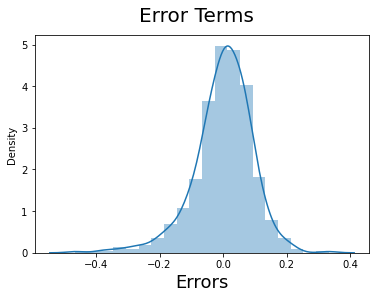

In [247]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

`Inferences`: - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### There is a linear relationship between X and Y

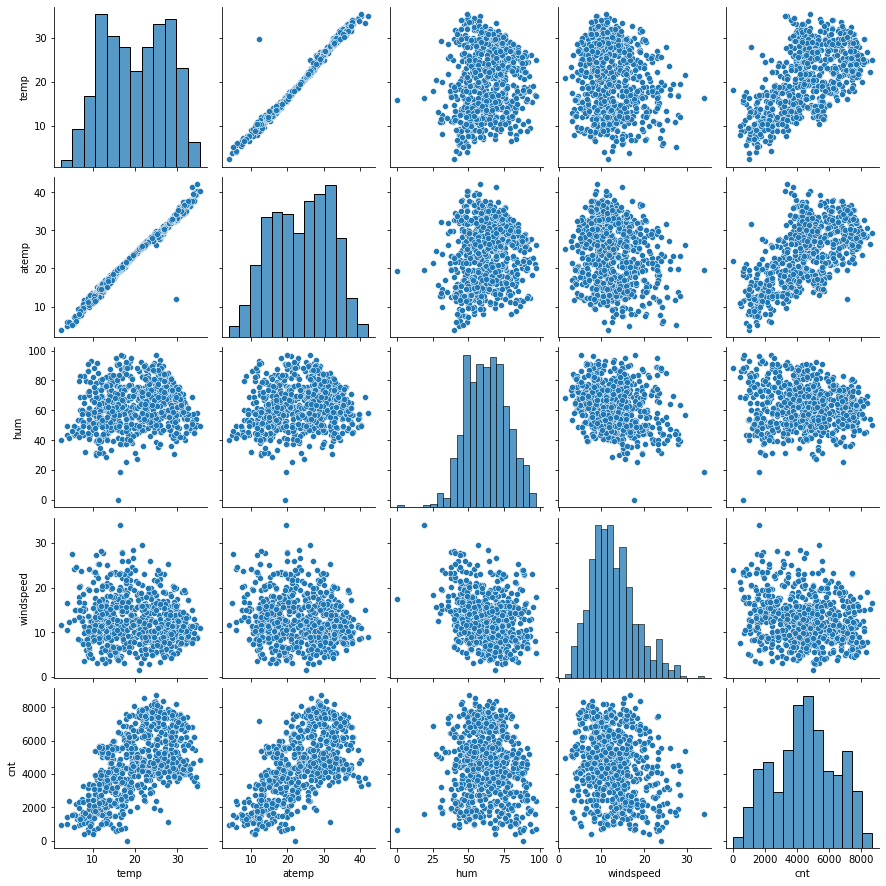

In [248]:
bike_num=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num)
plt.show()

INSIGHT: - Using the pair plot, we can see there is a linear relation between temp and atemp variable with the predictor ‘cnt’. -

### There is No Multicollinearity between the predictor variables

In [249]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,windspeed,4.81
1,temp,4.39
0,yr,2.04
4,season_winter,2.00
3,season_spring,1.85
10,mnth_10,1.63
6,weathersit_Mist_cloudy,1.52
8,mnth_5,1.22
9,mnth_9,1.21
7,mnth_3,1.20


`Inferences`: - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

In [250]:
X_t=X_train_new.iloc[:,0].values

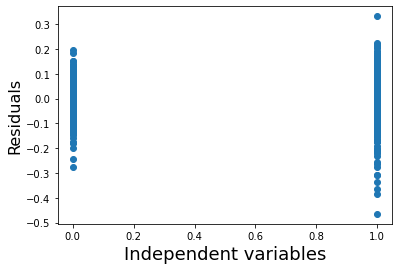

In [251]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

### Predictions on Final Model

Applying the scaling on the test sets

In [252]:

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [253]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,0,0,1
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,1,0,0,0,0


In [254]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.082192,0.086758,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.275286,0.282125,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [255]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   yr                                       219 non-null    int64  
 1   holiday                                  219 non-null    int64  
 2   workingday                               219 non-null    int64  
 3   temp                                     219 non-null    float64
 4   atemp                                    219 non-null    float64
 5   hum                                      219 non-null    float64
 6   windspeed                                219 non-null    float64
 7   season_spring                            219 non-null    uint8  
 8   season_summer                            219 non-null    uint8  
 9   season_winter                            219 non-null    uint8  
 10  weathersit_Light_rain_snow_Thunderstorm  219 non-

In [256]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   const                                    219 non-null    float64
 1   yr                                       219 non-null    int64  
 2   temp                                     219 non-null    float64
 3   windspeed                                219 non-null    float64
 4   season_spring                            219 non-null    uint8  
 5   season_winter                            219 non-null    uint8  
 6   weathersit_Light_rain_snow_Thunderstorm  219 non-null    uint8  
 7   weathersit_Mist_cloudy                   219 non-null    uint8  
 8   mnth_3                                   219 non-null    uint8  
 9   mnth_5                                   219 non-null    uint8  
 10  mnth_9                                   219 non-

In [257]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

## Model Evaluation

Text(0, 0.5, 'y_pred')

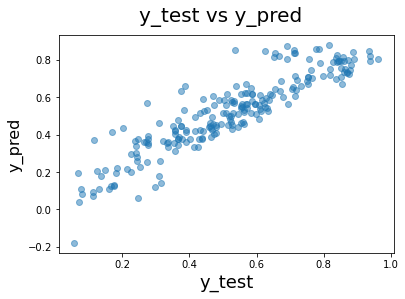

In [258]:
# Plotting y_test and y_pred to understand the spread
# import matplotlib.pyplot as plt
# import numpy as np


fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

### R^2 Value for Test dataset

In [259]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8164412524761809

#### Adjusted R^2 Value for Test dataset
Formula for Adjusted R^2

R2adj.=1−(1−R2)∗n−1n−p−1

In [260]:
r2=0.8164412524761809

In [261]:
X_test.shape

(219, 11)

In [262]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8066869228976206

## Final Result Comparison

 - Train R^2 :0.827
 - Train Adjusted R^2 :0.823
 - Test R^2 :0.816
 - Test Adjusted R^2 :0.806
 - This seems to be a really good model that can very well 'Generalize' various datasets. 

## FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:
- Temperature (temp) - A coefficient value of ‘0.408372’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.408372 units. 
- Weather Situation 3 (weathersit_Light Snow_Rain_Thunderstorm) - A coefficient value of ‘-0.319994’ indicates that a unit increase in weathersit_Light Snow_Rain_Thunderstorm variable decreases the bike hire numbers by 0.3070 units. 
- Year (yr) - A coefficient value of ‘0.2336’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2336 units. 

Recommendation for high demand is give these predictor variables more importance.
- The next best features that can also be considered are 
- season_winter : - A coefficient value of ‘0.032049’ indicates that, a unit increase in season_winter variable increases the bike hire numbers by 0.032049 units. 

- windspeed: - A coefficient value of ‘-0.140327’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.140327 units. 

